<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Supervised_Learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Learning with scikit-learn

from DataCamp course

modified notes from the course and solved exercises by me

##Classification

**The classification challenge**

> We have a set of labeled data and we want to build a classifier that takes unlabeled data as input and outputs a label.

First: choose the right type of the classifier. 

Second: take data which is already labeled. 

**k-Nearest Neighbors** *predicts the label of any data point by looking at the K, closest labeled data points and getting them to vote on what label the unlabeled point should have*

*k-Nearest Neighbors* - classification examples

 how do you classify a blue data point in the middle:

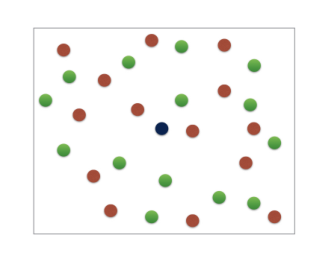

 * if k equals 3:

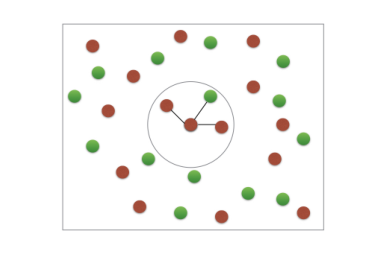
> as red
 * if k equals 5:

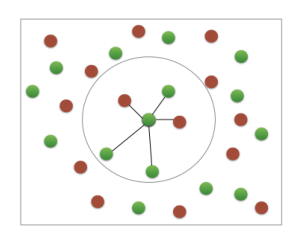

>as green.



**kNN on Iris dataset scatterplot**

Here we have 2d plot of the Iris dataset. It is visualized as 2d for the learning purposes, naturally it holds more than 2 dimensions. 
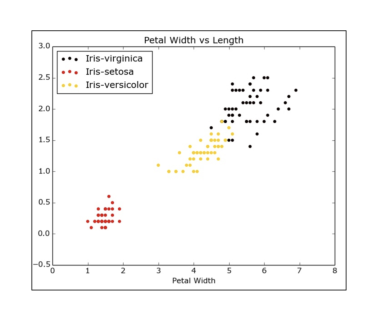
kNN creates a decision boundaries, visualized on the plot. 

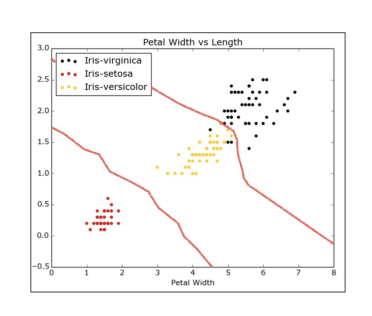
Any new data point within those boundries will be precidted according to it as  'setosa', 'virginica' or  'versicolor'.

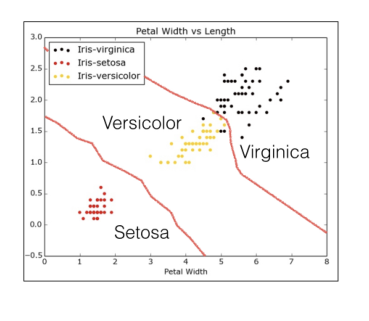

**Scikit-learn fit and predict**

*All machine learning models in scikit-learn are implemented as python classes.*
classes serve two purposes:
* they implement the algorithms for learning a model and predicting,
* storing all the information that is learned from the data. 

Training (fitting) a model to the data is performed with the method ```.fit()```. And the ```.predict()``` method is used to predict the label of an, unlabeled data point.

**Fit a model: step by step**

> The scikit-learn API *requires* firstly that you have **the data as a NumPy array or pandas DataFrame**. 

> It also *requires* that the features take on **continuous values**, such as the price of a house, as opposed to categories, such as 'male' or 'female'.

> It also *requires* that there are **no missing values** in the data.

>  *Requires* that the features are in an array where **each column is a feature** and **each row a different observation** or data point. 


* import KNeighborsClassifier from sklearn.neighbors.

```
from sklearn.neighbors import KNeighborsClassifier
```

* then instantiate our KNeighborsClassifier, set the number of neighbors equal to 6, and assign it to the variable knn

```
knn = KNeighborsClassifier(n_neighbors=6)
```
* fit this classifier to our training set, the labeled data - we apply the method fit to the classifier and pass it two arguments: the features as a NumPy array and the labels, or target, as a NumPy array.

```
knn.fit(iris['data'], iris['target'])
```
Returns the classifier itself and modifies it to fit it to the data. 
```
KNeighborsClassifier(algorithm='auto', leaf_size=30,
metric='minkowski',metric_params=None, n_jobs=1,
n_neighbors=6, p=2,weights='uniform')
```

Looking at the shape of iris data, we see that there are 150 observations of four features.

```
iris['data'].shape
```
```
(150, 4)
```

The target needs to be a single column with the same number of observations as the feature data.

```
iris['target'].shape
```

```
(150,)
```

In this case there are indeed also 150 labels. 

---
 We have fit our classifier, lets use it to predict on some unlabeled data!

**Predicting on unlabeled data**

 We have set of observations, X new.

```
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
[5.7, 2.6, 3.8, 1.3],
[4.7, 3.2, 1.3, 0.2]])
```

We use the predict method on the classifier and pass it the data. 

```
prediction = knn.predict(X_new)
```

The API requires that we pass the data as a NumPy array with features in columns and observations in rows; checking the shape of X new, we see that it has three rows and four columns, that is, three observations and four features. 
```
X_new.shape
```
```
(3, 4)
```
Then we would expect calling knn.predict of X new to return a three-by-one array with a prediction for each observation or row in X new. And indeed it does! It predicts one, which corresponds to 'versicolor' for the first two observations and 0, which corresponds to 'setosa' for the third.

```
print('Prediction: {}’.format(prediction))
```
```
Prediction: [1 1 0]
```


**k-NN in practice - fitting**

Fit a k-Nearest Neighbors classifier to the voting dataset. 
> The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. 

> The target needs to be a single column with the same number of observations as the feature data.

Create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.


* Import KNeighborsClassifier from sklearn.neighbors.
* Create arrays X and y for the features and the target variable. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
* Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
* Fit the classifier to the data using the .fit() method.

```
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)
```

**kNN predicting in practice**

Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

* Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
* Instantiate a KNeighborsClassifier with 6 neighbors.
* Fit the classifier to the data.
* Predict the labels of the training data, X.
* Predict the label of the new data point X_new.

```

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
```

```
Prediction: ['democrat']
```
 Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? This is what you will learn next.

**Measuring model performance**

Now that we know how to fit a classifier and use it to predict the labels of previously unseen data, we need to figure out how to measure its performance. That is, we need a metric.

In classification we use a metric of **accuracy** - *the number of correct predictions divided by the total number of data points.*

> Which data do we use to compute accuracy?

We are interested in is **how well our model will perform on new data, samples that the algorithm has never seen before**.

You could compute the accuracy on the data you used to fit the classifier. However, as this data was used to train it, the classifier's performance will not be indicative of how well it can generalize to unseen data.

For this reason, **it is common practice to split your data into two sets, a training set and a test set**.

* You train or fit the classifier on the training set.
* Then you make predictions on the labeled test set and compare these predictions with the known labels. 
* You then compute the accuracy of your predictions.

**Train/test split**

How to proceed with train/test split?

1.  Import train test split from sklearn.model selection.


```
from sklearn.model_selection import train_test_split
```

2. Use the train test split function to randomly split our data. 
  * The first argument will be the feature data, the second the targets or labels. 
  * The test size keyword argument specifies what proportion of the original data is used for the test set. 
  * the random state kwarg sets a seed for the random number generator that splits the data into train and test. *Setting the seed with the same argument later will allow you to reproduce the exact split and your downstream results.*
  
   > Train test split returns four arrays: the training data, the test data, the training labels, and the test labels.
   
   >  We unpack these into four variables: X train, X test, y train, and y test, respectively. 
   
   **By default, train test split splits the data into 75% training data and 25% test data, which is a good rule of thumb.** 
   > We specify the size of the test size using the keyword argument test size, which we do here to set it to 30%. 
   
   *It is also best practice to perform your split so that the split reflects the labels on your data.*
   
   > That is, you want the labels to be distributed in train and test sets as they are in the original dataset. *To achieve this, we use the keyword argument stratify equals y, where y the list or array containing the labels.*

3.  Instantiate our K-nearest neighbors classifier

```
knn = KNeighborsClassifier(n_neighbors=8)
```

4. Fit it to the training data using the fit method
```
knn.fit(X_train, y_train)
```

5. Make our predictions on the test data and store the results as y pred. 

```
y_pred = knn.predict(X_test)
```

6.  Printing them shows that the predictions take on three values, as expected. 
```
print(\"Test set predictions:\\n {}\".format(y_pred))
```

```
Test set predictions:
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0
1 2 2 0 0 2 2 1 1 2 1 1 0 2 1
```

7. To check out the accuracy of our model, we use the score method of the model and pass it X test and y test. 

```
knn.score(X_test, y_test)
```

8. See here that the accuracy of our K-nearest neighbors model is approximately 95%, which is pretty good for an out-of-the-box model!

```
0.9555555555555556
```
**Model complexity**

Let's visualize a decision boundary for several, increasing values of K in a KNN model.

> Note that, as K increases, the decision boundary gets smoother and less curvy. 

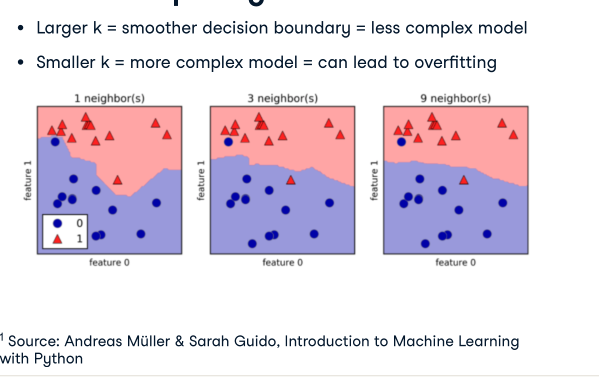

*We consider it to be a less complex model than those with a lower K.*

**Overfitting** Complex models run the risk of being sensitive to noise in the specific data that you have, rather than reflecting general trends in the data. This is know as overfitting.

**Underfitting**
If you increase K even more and make the model even simpler, then the model will perform less well on both test and training sets, as indicated in this schematic figure, known as a model complexity curve.
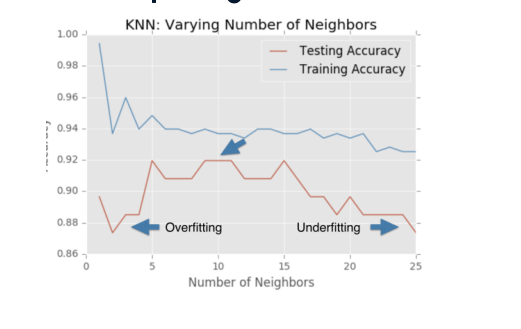

The best performance on the test set is always in the middle.

**The digits recognition**

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

* Import datasets from sklearn and matplotlib.pyplot as plt.
* Load the digits dataset using the .load_digits() method on datasets.
* Print the keys and DESCR of digits.
* Print the shape of images and data keys using the . notation.
* Display the 1011th image using plt.imshow(). This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

```
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
```

```
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
    Optical Recognition of Handwritten Digits Data Set
    ===================================================
    
    Notes
    -----
    Data Set Characteristics:
        :Number of Instances: 5620
        :Number of Attributes: 64
        :Attribute Information: 8x8 image of integer pixels in the range 0..16.
        :Missing Attribute Values: None
        :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
        :Date: July; 1998
    
    This is a copy of the test set of the UCI ML hand-written digits datasets
    http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
    
    The data set contains images of hand-written digits: 10 classes where
    each class refers to a digit.
    
    Preprocessing programs made available by NIST were used to extract
    normalized bitmaps of handwritten digits from a preprinted form. From a
    total of 43 people, 30 contributed to the training set and different 13
    to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
    4x4 and the number of on pixels are counted in each block. This generates
    an input matrix of 8x8 where each element is an integer in the range
    0..16. This reduces dimensionality and gives invariance to small
    distortions.
    
    For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
    T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
    L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
    1994.
    
    References
    ----------
      - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
        Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
        Graduate Studies in Science and Engineering, Bogazici University.
      - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
      - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
        Linear dimensionalityreduction using relevance weighted LDA. School of
        Electrical and Electronic Engineering Nanyang Technological University.
        2005.
      - Claudio Gentile. A New Approximate Maximal Margin Classification
        Algorithm. NIPS. 2000.
    
    (1797, 8, 8)
    (1797, 64)
```

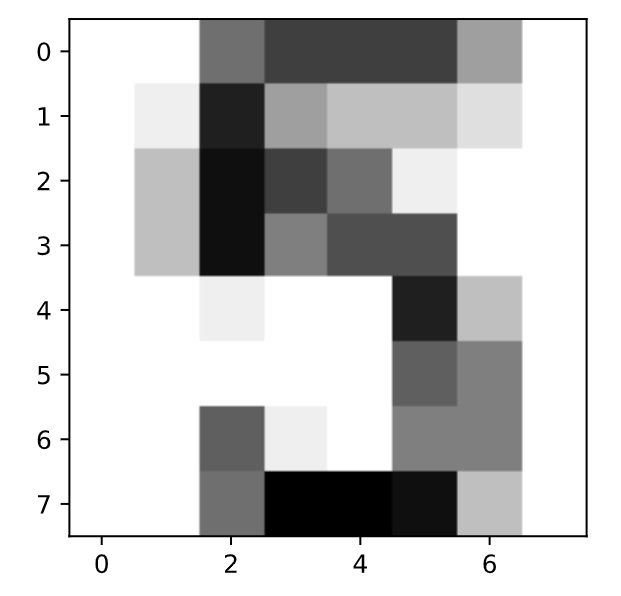


> looks like the image in question corresponds to the digit '5'. Now, can you build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? 

**Train/Test Split + Fit/Predict/Accuracy**

After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

* Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
* Create an array for the features using digits.data and an array for the target using digits.target.
* Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
* Create a k-NN classifier with 7 neighbors and fit it to the training data.
* Compute and print the accuracy of the classifier's predictions using the .score() method.

```
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))
```

```
  0.9833333333333333
```
This out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.


**Overfitting and underfitting**

You will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

* Inside the for loop:
  * Setup a k-NN classifier with the number of neighbors equal to k.
  * Fit the classifier with k neighbors to the training data.
  * Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.

```
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn =  KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

```

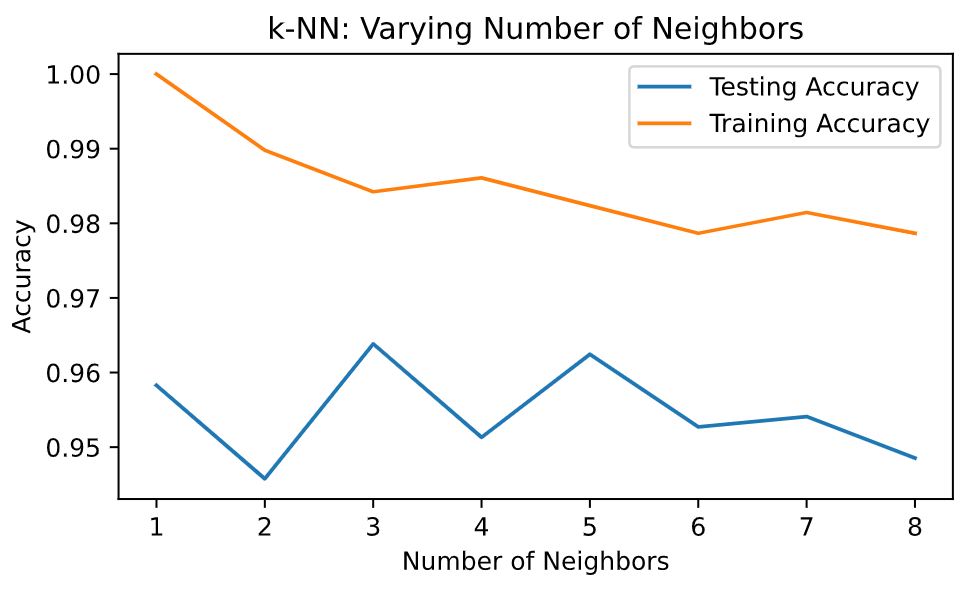



>  It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

##Regression

###Introduction to regression

1. Checking out the dataset

  *  load it from a comma-separated values file
  ```
  boston = pd.read_csv('boston.csv')
  ```
  * view the head of the data frame using the head method
  ```
  print(boston.head())
  ```

> The documentation tells us the feature 'CRIM' is per capita crime rate, 'NX' is nitric oxides concentration, and 'RM' average number of rooms per dwelling, for example. The target variable, 'MEDV', is the median value of owner occupied homes in thousands of dollars.

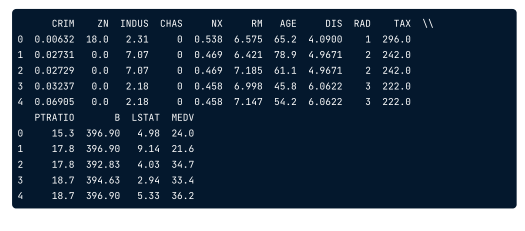```




2. Creating feature and target arrays
  * scikit-learn wants 'features' and target' values in distinct arrays, X and y, we split our DataFrame: 
    * first line here, we drop the target:
    ```
    X = boston.drop('MEDV', axis=1).values
    ```
    * in the second, we keep only the target:
    ```
    y = boston['MEDV'].values
    ```
3. Predicting house value from a single feature
  * Predict the price from a single feature: the average number of rooms in a block:
    * slice out the number of rooms column of the DataFrame X, which is the fifth column into the variable X rooms:
    ```
    X_rooms = X[:,5]
    ```
    * Checking the type of X rooms and y, we see that both are NumPy arrays:
    ```
    type(X_rooms), type(y)
    (numpy.ndarray, numpy.ndarray)
    ```
    * to turn them into NumPy arrays of the desired shape, we apply the reshape method to keep the first dimension, but add another dimension of size one to X:
    ```
    y = y.reshape(-1, 1)
    X_rooms = X_rooms.reshape(-1, 1)
    ```

4. Plotting house value vs. number of rooms

Plot house value as a function of number of rooms using matplotlib's plt dot scatter. We'll also label our axes using x label and y label.
```
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();
```
>  as one might expect, more rooms lead to higher prices.


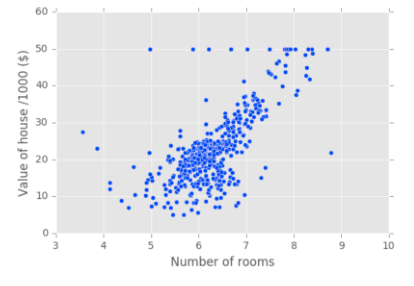



5.  Fitting a regression model

We're going to use a model called linear regression:
  * import numpy as np
  * linear model from sklearn
  * and instantiate LinearRegression as regr
  ```
  import numpy as np
  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  ```
  * fit the regression to the data using regr dot fit and passing in the data, the number of rooms, and the target variable, the house price, as we did with the classification problems:
  ```
  reg.fit(X_rooms, y)
  ```
  * check out the regressors predictions over the range of the data. We can achieve that by using ```np.linspace``` between the maximum and minimum number of rooms and make a prediction for this data:
  ```
  prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)
  ```
 * plotting this line with the scatter plot results in the figure you see here:
 ```
 plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
color='black', linewidth=3)
plt.show()
```
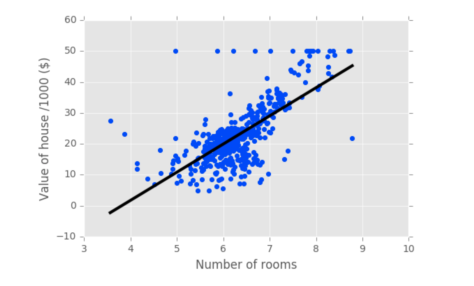

**Importing data for supervised learning**
Use 'gapminder.csv' data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

The target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to.

* Import numpy and pandas as their standard aliases.
* Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
* Create array X for the 'fertility' feature and array y for the 'life' target variable.
* Reshape the arrays by using the .reshape() method and passing in -1 and 1.

```
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
X = df['fertility'].values
y = df['life'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)
```
```
 Dimensions of y before reshaping:  (139,)
  Dimensions of X before reshaping:  (139,)
  Dimensions of y after reshaping:  (139, 1)
  Dimensions of X after reshaping:  (139, 1)
```

> Notice the differences in shape before and after applying the .reshape() method. Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

**Exploring the Gapminder data**

Check out this heatmap. Cells that are in green show positive correlation, while cells that are in red show negative correlation.

> Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

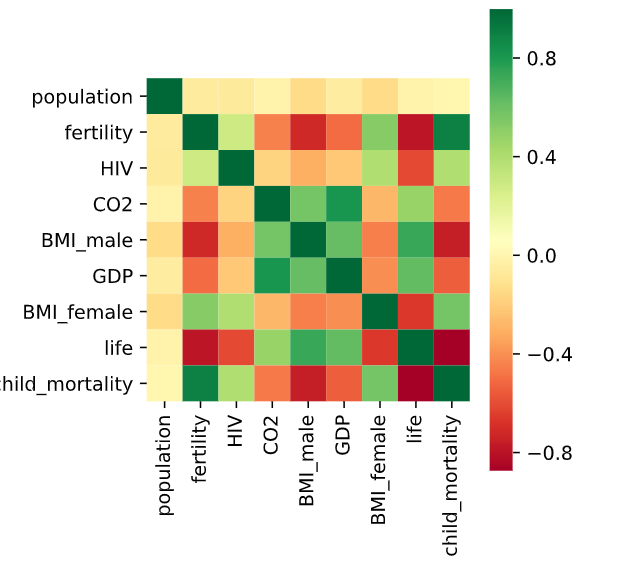

###The basics of linear regression

**how linear regression work?**

We want to fit a line to the data

**and a line in two dimensions is always of the form y = ax + b,**

* y is the target
* x is the single feature
* a and b are the parameters of the model that we want to learn

> So the question of fitting is reduced to: *how do we choose a and b*?

  * *loss or a cost function* - common method is to define an error function for any given line and then to choose the line that minimizes the error function.

**The loss function**

We want the line to be as close to the actual data points as possible.  we wish to minimize the vertical distance between the fit and the data. So for each data point, we calculate the vertical distance between it and the line. This distance is called a residual.

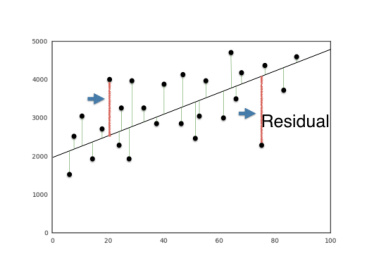

There are couple of large positive and negative residuals here, for that reason  we minimize the sum of the squares of the residuals. This will be our loss function and using this loss function is commonly called **ordinary least squares**, or OLS for short. 

>  this is the same as minimizing the mean squared error of the predictions on the training set

*When you call fit on a linear regression model in scikit-learn, it performs this OLS under the hood.*

**Linear regression in higher dimensions**

*two features and one target*, the line form is **y = a1*1 + a2*2 + b**

> to fit a linear regression model is to specify three variables, a1, a2, and b.

When we have more than one or two features to fit a linear regression model, we must specify coeffcient for each feature and the variable b.

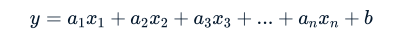

With the scikit-learn API we're working the same way: 
* pass the fit method two arrays:
  * one containing the features,
  * the other the target variable.

**Linear regression on all features**

1. Split data into training and test sets:
```
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
```

2. Instantiate the regressor:
```
reg_all = LinearRegression()
```

3. Fit it on the training set:
```
reg_all.fit(X_train, y_train)
```

4. Predict on the test set:
```
y_pred = reg_all.predict(X_test)
```

>  The default scoring method (measurements of prediction accuracy) for linear regression is called **R squared**. This metric quantifies the amount of variance in the target variable that is predicted from the feature variables.
5. To compute the R squared, we once again apply the method score to the model and pass it two arguments: the test data and the test data target. 

```
reg_all.score(X_test, y_test)
```
```
0.71122600574849526
```

*Generally you will never use linear regression out of the box like this; you will most likely wish to use regularization - places further constraints on the model coefficients.*

**Fit & predict for regression - practice**

Use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.
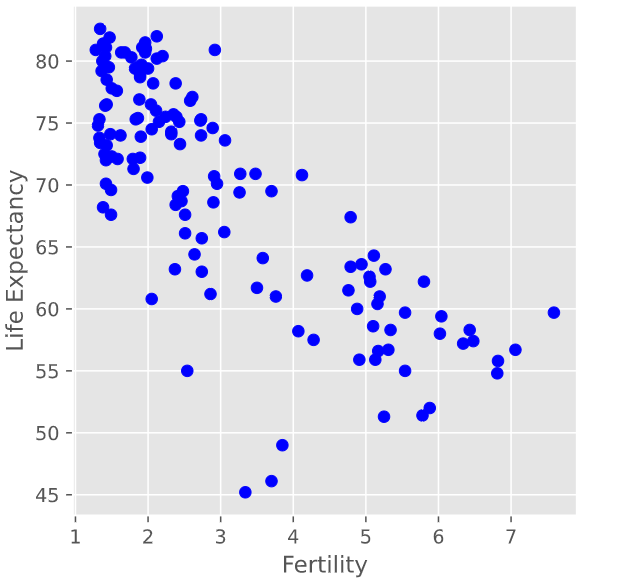
As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute R squared and print the  score using scikit-learn's .score() method.

* Import LinearRegression from sklearn.linear_model.
* Create a LinearRegression regressor called reg.
* Set up the prediction space to range from the minimum to the maximum of 8 X_fertility.
* Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
* Compute and print the R squared score using the .score() method

```
# Import LinearRegression
from sklearn.linear_model import LinearRegression
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()
```

```
0.6192442167740035
```
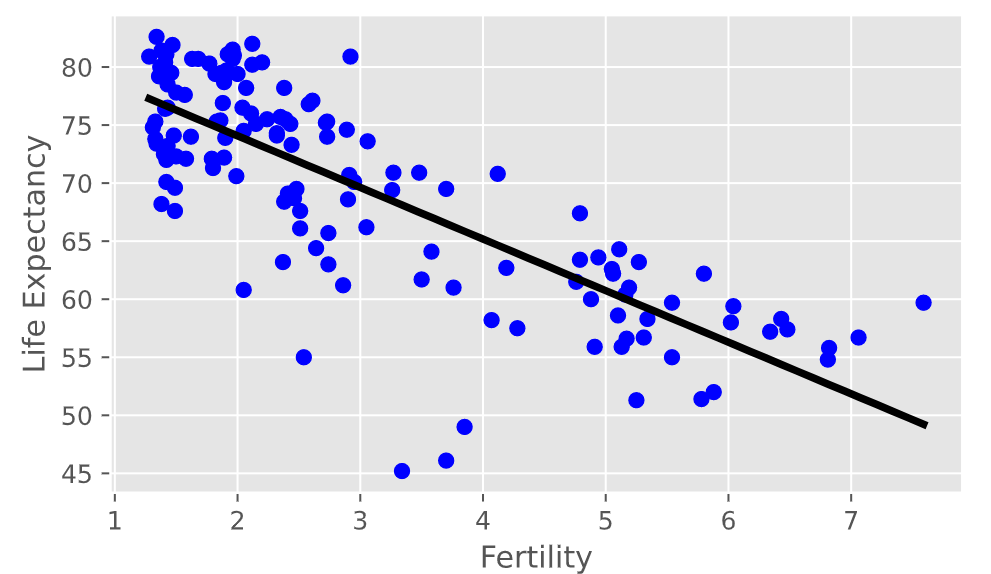
> Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!



**Train/test split for regression**

Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

Split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the  score, you will also compute the **Root Mean Squared Error (RMSE)**, which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

* Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
* Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
* Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
* Compute and print the  score using the .score() method on the test set.
* Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().

```
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all =  LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
```
```
R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213
```

Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process.



###Cross-validation

If you're computing R squared on your test set, the *R squared returned is dependent on the way that you split up the data*. 

The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize to unseen data. **To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation.**

**Cross-validation basics**

* split the dataset into five groups or folds
* hold out the first fold as a test set
* fit our model on the remaining four folds

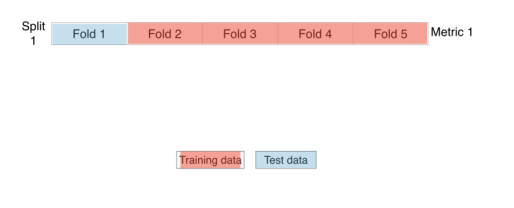

* predict on the test set
* compute the metric of interest.


Next:
* hold out the second fold as our test set
* fit on the remaining data
* predict on the test set, and
* compute the metric of interest.
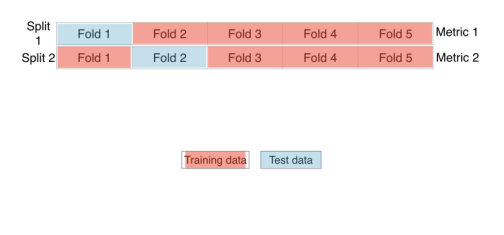


Then do the same with all the reamaining folds. 

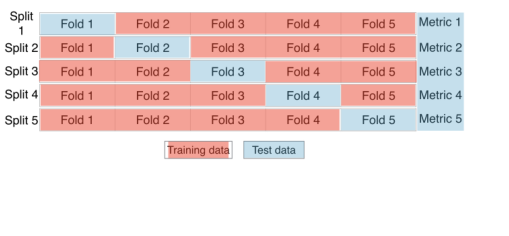

As a result **we get five values of R squared** from which we can *compute statistics of interest, such as the mean and median and 95% confidence intervals*.

> As we split the dataset into five folds, we call this process 5-fold cross validation. If you use 10 folds, it is called 10-fold cross validation. More generally, if you use k folds, it is called k-fold cross validation or k-fold CV.

!using more folds is more computationally expensive.

**Cross-validation in scikit-learn**

To perform k-fold CV in scikit-learn:

1. Import cross val score from sklearn.model selection
```
from sklearn.model_selection import cross_val_score
```
2. Instantiate our model, in this case, a regressor
```
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
```
3. Call cross val score with the regressor, the feature data, and the target data as the first three positional arguments. We also specify the number of folds with the keyword argument, cv

```
cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
```

Returns an array of cross-validation scores, which we assign to cv results. The length of the array is the number of folds utilized. Note that the score reported is R squared, as this is the default score for linear regression.

```
[ 0.63919994 0.71386698 0.58702344 0.07923081 -0.25294154]
```

**5-fold cross-validation - practice**

Cross-validation maximizes the amount of data that is used to train the model, as during the course of training, **the model is not only trained, but also tested on all of the available data**.

practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R squared as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

* Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
* Create a linear regression regressor called reg.
* Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
* Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

```
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
```

```
 [0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
    Average 5-Fold CV Score: 0.8599627722793232
```

**K-Fold CV comparison**

CV with more folds is computationally more expensive. In this exercise we'll compute 3-folds CV and 10-folds CV for the comparison. With ```%timeit``` we'll see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

```
%timeit cross_val_score(reg, X, y, cv = ____)
```

* Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
* Create a linear regression regressor called reg.
* Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.

```
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))
````

```
 0.8718712782622108
  0.8436128620131201
```


```
In [1]:
%timeit cross_val_score(reg, X, y, cv = 3)
100 loops, best of 3: 6.66 ms per loop
In [2]:
%timeit cross_val_score(reg, X, y, cv = 10)
10 loops, best of 3: 20.8 ms per loop
```


###Regularized regression

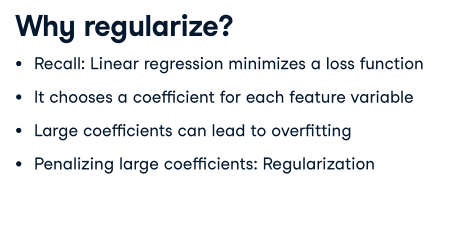

Fitting a linear regression minimize a loss function to choose a coefficient ai for each feature variable. *If we allow these coefficients or parameters to be super large, we can get overfitting.*

 It isn't so easy to see in two dimensions, but when you have loads and loads of features, that is, **if your data sit in a high-dimensional space with large coefficients, it gets easy to predict nearly anything.**

 >  For this reason, it is common practice to **alter the loss function so that it penalizes for large coefficients**. This is called *regularization*. 

 One of the types of regularized regression is...

**Ridge regression** in it our loss function is the standard OLS(Ordinary least squares) loss function plus the squared value of each coefficient multiplied by some constant alpha.

When minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients. 

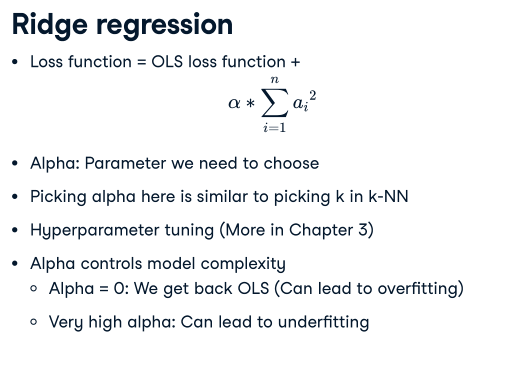

*Alpha is a parameter we need to choose in order to fit and predict.* We can select the alpha for which our model performs best (**Hyperparameter tuning**). Picking alpha for ridge regression is similar to picking k in KNN.

This alpha, which you may *also see called lambda*, can be thought of as a parameter that **controls model complexity**. 

> When alpha is equal to zero, we get back OLS.

*Large coefficients in this case are not penalized and the overfitting problem is not accounted for.*

> A very high alpha means that large coefficients are significantly penalized, which *can lead to a model that is too simple and ends up underfitting the data.*


** Ridge regression in scikit-learn**

1. Import Ridge from sklearn.linear model
```
from sklearn.linear_model import Ridge
```

2. Split our data into test and train
```
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3, random_state=42)
```

3. We set alpha using the keyword argument alpha. Also notice the argument normalize: setting this equal to True ensures that all our variables are on the same scale
```
ridge = Ridge(alpha=0.1, normalize=True)
```

4. Fit on the training, and predict on the test
```
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
```

5. Call a score
```
ridge.score(X_test, y_test)
```

```
0.69969382751273179
```




**Lasso regression** *in which our loss function is the standard OLS loss function plus the absolute value of each coefficient multiplied by some constant alpha.*

```
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)
```
```
0.59502295353285506
```

*Lasso regression* can be used to select important features of a dataset. It is because it tends to **shrink the coefficients of less important features to be exactly zero.** 

> The features whose coefficients are not shrunk to zero are 'selected' by the LASSO algorithm.

**Lasso for feature selection in scikit-learn**
1. Import Lasso
```
from sklearn.linear_model import Lasso
```

2. Store the feature names in the variable names.
```
names = boston.drop('MEDV', axis=1).columns
```

3. Instantiate the regressor, fit it to the data
```
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
```
4. Extract the coef attribute and store in lasso coef.

```
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()
```

5. Plotting the coefficients as a function of feature name yields this figure and you can see directly that the most important predictor for our target variable, housing price, is number of rooms.

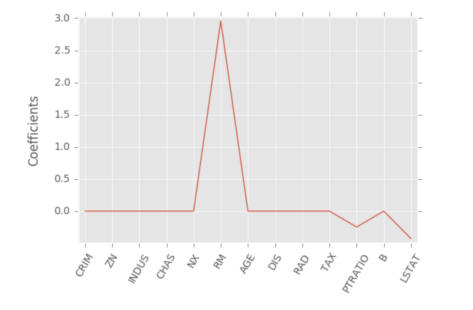


> This type of feature selection is very important for machine learning in an industry or business setting because it allows you, as a Data Scientist, to communicate important results to non-technical colleagues.

>  It is also valuable in research science, in order identify which factors are important predictors for various physical phenomena.



**Regularization I: Lasso - practice**

Fit a lasso regression to the Gapminder and plot the coefficients. You will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

* Import Lasso from sklearn.linear_model.
* Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
* Fit the regressor to the data and compute the coefficients using the coef_ attribute.
* Plot the coefficients on the y-axis and column names on the x-axis.

```
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()
```

```
  [-0.         -0.         -0.          0.          0.          0.
     -0.         -0.07087587]
```

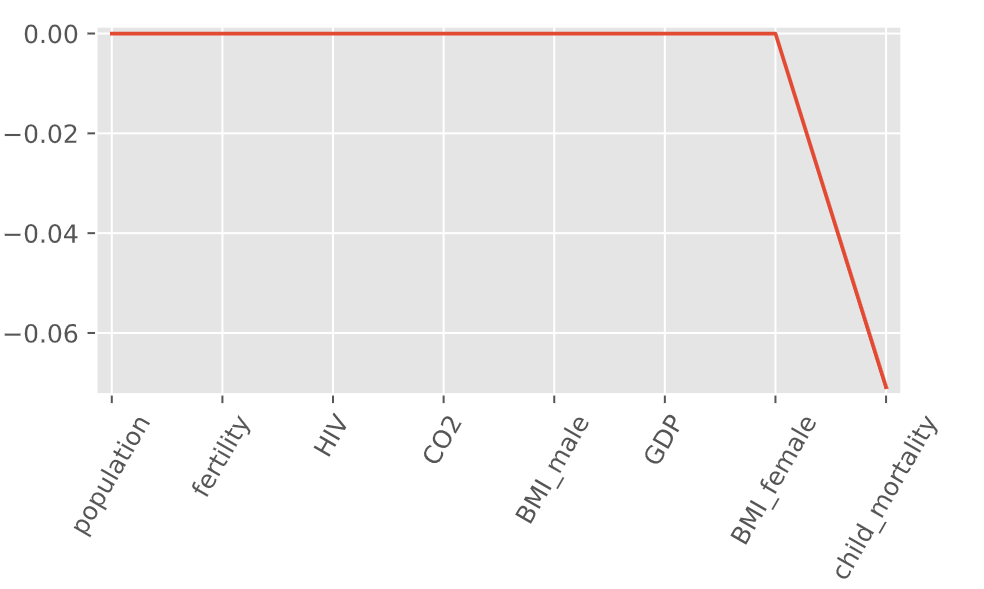

> It seems like 'child_mortality' is the most important feature when predicting life expectancy.

**Regularization II: Ridge**

Lasso is great for feature selection, but when building regression models, **Ridge regression should be your first choice.**

Lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated L2 scores for each, using function, which plots the  score as well as standard error for each alpha:

```
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
```

The motivation behind this exercise is for you to see how the R squared score varies with different alphas, and to understand the importance of selecting the right value for alpha.

* Instantiate a Ridge regressor and specify normalize=True.
* Inside the for loop:
  * Specify the alpha value for the regressor to use.
  * Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
  * Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
* Use the display_plot() function to visualize the scores and standard deviations.

```
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
```

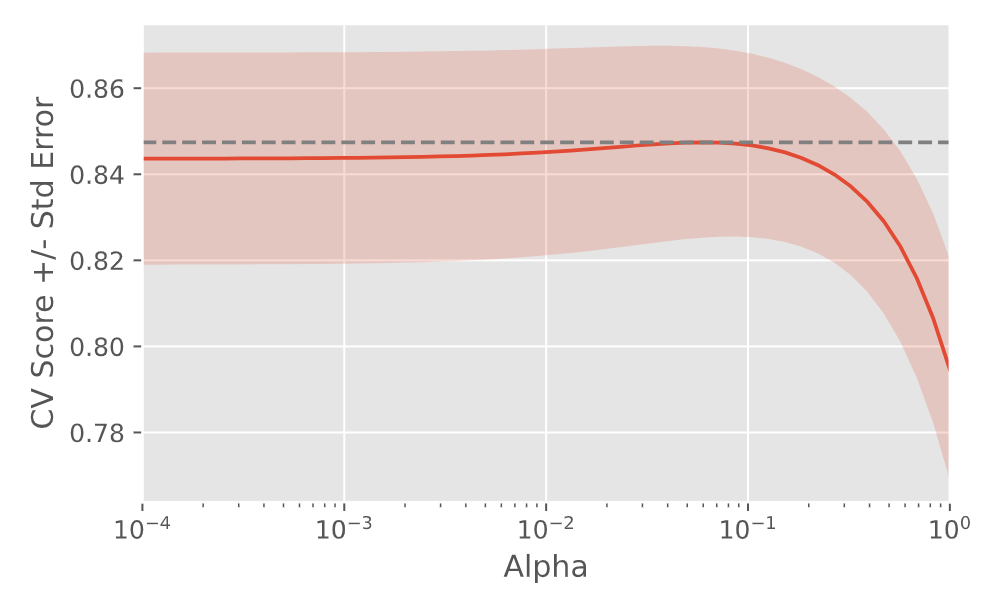

> Notice how the cross-validation scores change with different alphas. Which alpha should you pick? 


##Fine-tuning your model

###How good is your model?

With classification we used the accuraccy to see how many samples was correctly classified. But the accuraccy is not an universal tool for model evaluation. 

**Class imbalance example** * The situation when one class is more frequent*

> A spam classification problem in which 99% of emails are real and only 1% are spam. I could build a model that classifies all emails as real; this model would be correct 99% of the time and thus have an accuracy of 99%, which sounds great. However, this naive classifier does a horrible job of predicting spam: it never predicts spam at all, so it completely fails at its original purpose. 

 The class of real emails contains way more instances than the class of spam. 

*Situation like this is very common, to measure the performance of the implemented model, we need more nuansed metric*

**Diagnosing classification predictions**

Given a binary classifier, such as our spam email example, we can draw up a 2-by-2 matrix that summarizes predictive performance called a confusion matrix:
* across the top are the predicted labels,
* down the side the actual labels. 

Given any model, we can fill in the confusion matrix according to its predictions.

* In the top left square, we have the number of spam emails correctly labeled;
* in the bottom right square, we have the number of real emails correctly labeled;

* in the top right, the number of spam emails incorrectly labeled;
* in the bottom left, the number of real emails incorrectly labeled.

> Note that correctly labeled spam emails are referred to as true positives and correctly labeled real emails as true negatives. Incorrectly labeled spam will be referred to as false negatives and incorrectly labeled real emails as false positives.

**Usually, the "class of interest" is called the positive class. As we are trying to detect spam, this makes spam the positive class.**

Notice that you can retrieve accuracy from the confusion matrix: it's the sum of the diagonal divided by the total sum of the matrix.
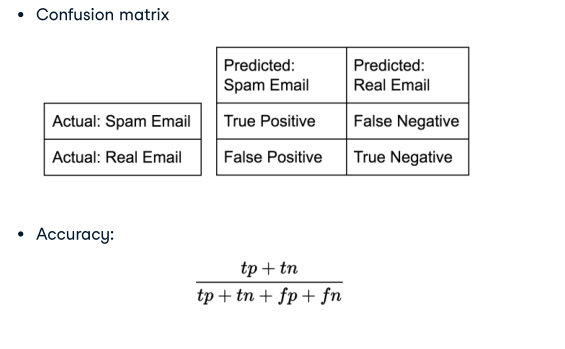


**Metrics from the confusion matrix**

There are several other important metrics you can easily calculate from the confusion matrix:

*  **Precision** - *which is the number of true positives divided by the total number of true positives and false positives*. It is also called the **positive predictive value** or PPV.

>  the number of correctly labeled spam emails divided by the total number of emails classified as spam

* **Recall** - *which is the number of true positives divided by the total number of true positives and false negatives*. This is also called **sensitivity**, hit rate, or **true positive rate**.

* **The F1-score** -  *defined as two times the product of the precision and recall divided by the sum of the precision and recall* - the harmonic mean of precision and recall.

> *High precision* means that our classifier had a *low false positive rate*, that is, not many real emails were predicted as being spam.

> *High recall* means that our classifier *predicted most positive or spam emails correctly*.

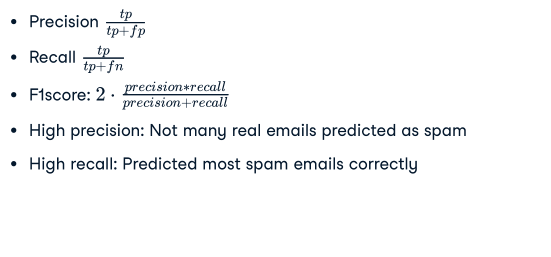

**Confusion matrix in scikit-learn**

1. Import classification report and confusion matrix from sklearn.metrics

```
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
```

2. Instantiate classifier, split the data into train and test, fit the training data, and predict the labels of the test set.

```
knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
```
3. To compute the confusion matrix: pass the test set labels and the predicted labels to the function confusion matrix.

```
print(confusion_matrix(y_test, y_pred))
```
```
[[52 7]
[ 3 112]]
```

4. To compute the resulting metrics, pass the same arguments to classification report, which outputs a string containing all the relevant metrics:

```
print(classification_report(y_test, y_pred))
```
```
precision recall f1-score support
0 0.95 0.88 0.91 59
1 0.94 0.97 0.96 115
avg / total 0.94 0.94 0.94 174
```

> For all metrics in scikit-learn, the *first argument* is always the **true label** and the *prediction* is always the **second argument**.

**Metrics for classification**

Predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies.  

> It is a binary classification problem. 

A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. 

Train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

* Import classification_report and confusion_matrix from sklearn.metrics.
* Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
* Instantiate a k-NN classifier with 6 neighbors, fit it to the training data, and predict the labels of the test set.
* Compute and print the confusion matrix and classification report using the confusion_matrix() and classification_report() functions.

```
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

```
   [[176  30]
     [ 52  50]]
                 precision    recall  f1-score   support
    
              0       0.77      0.85      0.81       206
              1       0.62      0.49      0.55       102
    
    avg / total       0.72      0.73      0.72       308
    
```

**Logistic regression and the ROC curve**

Logistic regression - another classification model - is used in classification problems, not regression problems. 

**Logistic regression for binary classification**

Given one feature, log reg will output a probability, p, with respect to the target variable:
* If p is greater than 0.5, we label the data as '1';
* if p is less than 0.5, we label it '0'.

> Log reg produces a linear decision boundary

**Logistic regression in scikit-learn**

1. Perform the necessary imports,
```
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
``` 
2. Instantiate the classifier, 
```
logreg = LogisticRegression()
```
3. Split your data into training and test sets, 
```
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4, random_state=42)
```
4. Fit the model on your training data, 
```
logreg.fit(X_train, y_train)
```
5. Predict on your test set.
```
y_pred = logreg.predict(X_test)
```

* By default, logistic regression threshold = 0.5
* Not specific to logistic regression
  * k-NN classifiers also have thresholds
* What happens if we vary the threshold?

**The ROC curve**

> what happens to the true positive and false positive rates as we vary the threshold?

* When the **threshold equals zero**, the *model predicts '1' for all the data*, which means the *true positive rate is equal to the false positive rate* is equal to one

* When the **threshold equals '1'**, the *model predicts '0' for all data*, which means that *both true and false positive rates are 0*.

* If we vary the threshold between these two extremes, we get a series of different false positive and true positive rates.

> The set of points we get when trying all possible thresholds is called the *receiver operating characteristic curve* or **ROC curve**.

**Plotting the ROC curve**

To plot the ROC curve:
* import roc curve from sklearn dot metrics; 
```
from sklearn.metrics import roc_curve
```
* we used the predicted probabilities of the model assigning a value of '1' to the observation in question. 
> This is because to compute the ROC we do not merely want the predictions on the test set, but we want the probability that our log reg model outputs before using a threshold to predict the label. 

  * To do this we apply the method ```predict_proba``` to the model and pass it the test data. ```predict_proba``` returns an array with two columns:
    * each column contains the probabilities for the respective target values.  
    > we choose the second column, the one with index 1, that is, the probabilities of the predicted labels being '1'.

```
y_pred_prob = logreg.predict_proba(X_test)[:,1]
```
* call the function roc curve; 
  * the first argument is given by the actual labels, 
  * the second by the predicted probabilities
  > We unpack the result into three variables: false positive rate, FPR; true positive rate, TPR; and the thresholds. 

```
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
```

* plot the FPR and TPR using pyplot's plot function to produce a figure 

```
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();
```

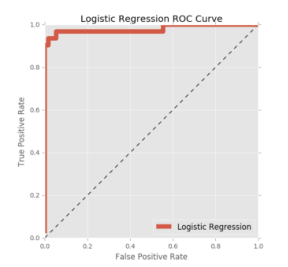




**Building a logistic regression model**

```scikit-learn``` makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'.

* Import:
  * LogisticRegression from sklearn.linear_model.
  * confusion_matrix and classification_report from sklearn.metrics.
* Create training and test sets with 40% (or 0.4) of the data used for testing. Use a random state of 42. This has been done for you.
* Instantiate a LogisticRegression classifier called logreg.
* Fit the classifier to the training data and predict the labels of the test set.
* Compute and print the confusion matrix and classification report. 

```
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred =  logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

```
[[176  30]
     [ 35  67]]
                 precision    recall  f1-score   support
    
              0       0.83      0.85      0.84       206
              1       0.69      0.66      0.67       102
    
    avg / total       0.79      0.79      0.79       308
```

> Logistic regression is used in a variety of machine learning applications and will become a vital part of your data science toolbox.

**Plotting an ROC curve**

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. 

> Most classifiers in scikit-learn have a ```.predict_proba()``` method which returns the probability of a given sample being in a particular class.

Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the ```.predict_proba()``` method and become familiar with its functionality.

* Import roc_curve from sklearn.metrics.
* Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
* Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.
* Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.

```
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
```

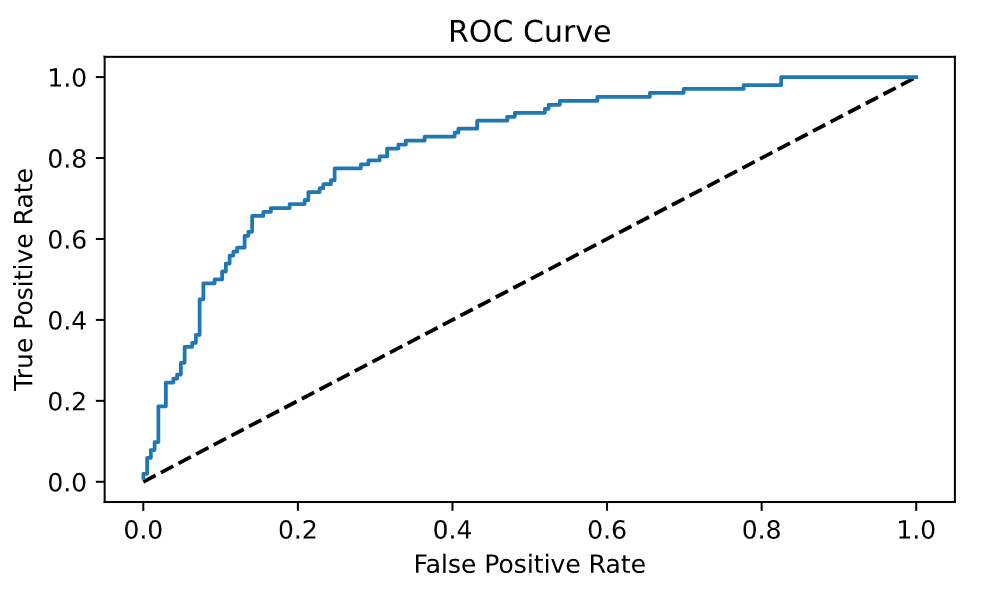

**Precision-recall Curve** 

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. 

> Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. 

One such way is the **precision-recall curve**, which is generated by *plotting the precision and recall for different thresholds*. As a reminder, precision and recall are defined as:

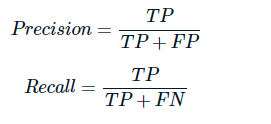

 precision-recall curve for the diabetes dataset:

 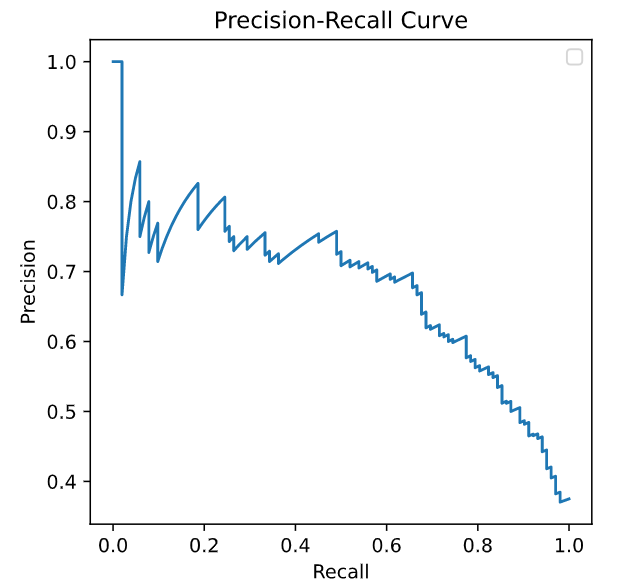

* Study the precision-recall curve and then consider the statements given below. Choose the one statement that is not true. Note that here, the class is positive (1) if the individual has diabetes.

> Precision and recall take true negatives into consideration.

###Area under the ROC curve

>given the ROC curve, can we extract a metric of interest?

**the larger the area under the ROC curve, the better our model is!**

If we had a model which produced an ROC curve that had a:
* single point at 1,0, 
* the upper left corner, representing a true positive rate of one 
* and a false positive rate of zero, 
> this would be a great model.

Because of this AUC - area under the curve - is considered another popular metric for the classification models. 

**AUC in scikit-learn**

1. Import roc auc score from sklearn.metrics
```
from sklearn.metrics import roc_auc_score
```

2. Instantiate classifier
```
logreg = LogisticRegression()
```

3. Split our data into train and test sets
```
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4, random_state=42)
```
4. Fit the model to the training set
```
logreg.fit(X_train, y_train)
```
5. Compute the predicted probabilities
```
y_pred_prob = logreg.predict_proba(X_test)[:,1]
```
6. Pass the true labels and the predicted probabilities to roc auc score.
```
roc_auc_score(y_test, y_pred_prob)
```

```
0.997466216216
```

> Another way to compute AUC is by using cross-validation

**AUC using cross-validation**

1. Import and use the function cross val score

```
from sklearn.model_selection import cross_val_score
```
2.  Pass it the estimator, the features, and the target
```
cv_scores = cross_val_score(logreg, X, y, cv=5,
scoring='roc_auc')
```
> additionally pass it the keyword argument scoring equals "roc auc" and print the AUC list as you can see here.

```
print(cv_scores)
```
```
[ 0.99673203 0.99183007 0.99583796 1. 0.96140652]
```

**AUC computation - exercise**

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5.

 > If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

* Import roc_auc_score from sklearn.metrics and cross_val_score from sklearn.model_selection.
* Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
* Compute the AUC score using the roc_auc_score() function, the test set labels y_test, and the predicted probabilities y_pred_prob.
* Compute the AUC scores by performing 5-fold cross-validation. Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'.

```
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5,
scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
```

```
AUC: 0.8254806777079764
    AUC scores computed using 5-fold cross-validation: [0.80148148 0.8062963  0.81481481 0.86245283 0.8554717 ]
```



###Hyperparameter tuning


